<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Time_Series/Codes_Search/Time_Series_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)


Prophet 0.7.1


In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [ ]:
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


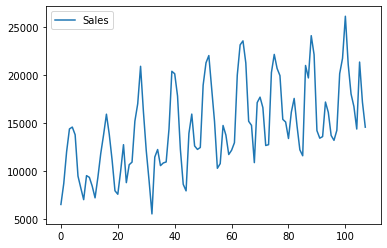

In [ ]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [ ]:
from pandas import to_datetime
from fbprophet import Prophet

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12827.413386  15877.971861
1 1968-02-01  14905.955964  13266.260532  16381.801069
2 1968-03-01  20842.150502  19233.752142  22454.438537
3 1968-04-01  22870.095215  21423.293506  24421.970339
4 1968-05-01  24176.211162  22623.295696  25894.371745


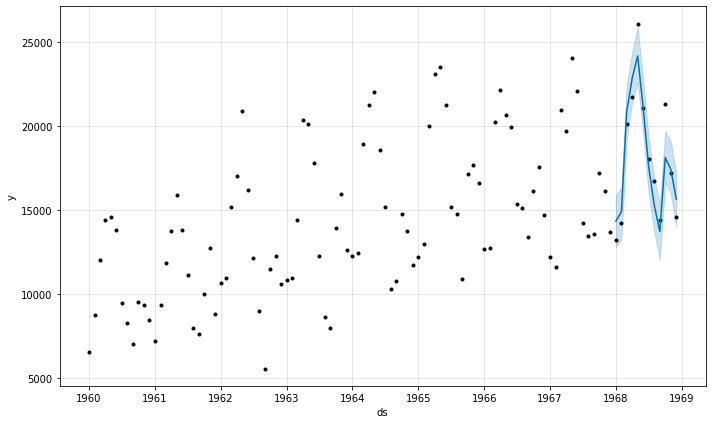

In [ ]:
# define the period for which we want a prediction
from matplotlib import pyplot
from pandas import DataFrame

future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()